<a href="https://colab.research.google.com/github/shakilgazi/Image-classification-using-CNN/blob/main/Image_classification_using_CNN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN Project

# Import Libraries

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

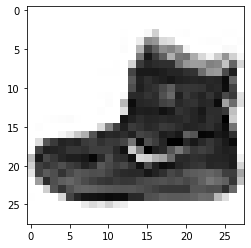

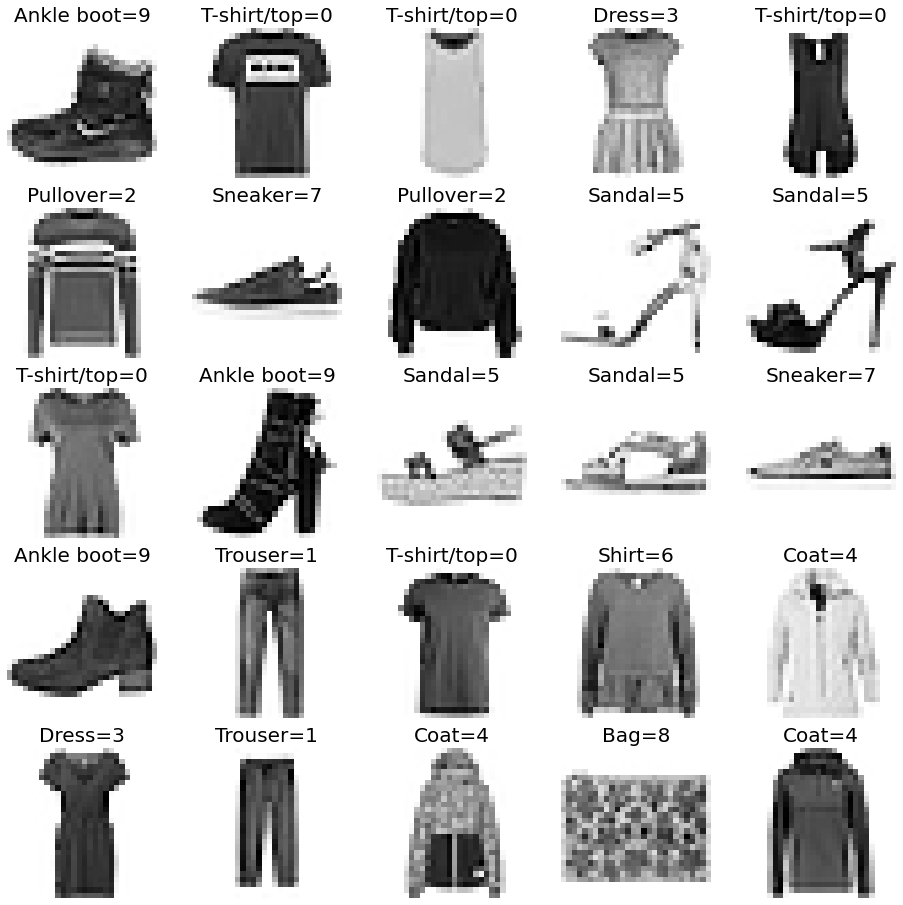

In [ ]:
plt.imshow(X_train[0], cmap ="Greys")
 
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
"""## Build Neural Network"""
 
model = keras.models.Sequential([
                         keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(units=32, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])                         

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5479 - accuracy: 0.8082


In [ ]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2846 - accuracy: 0.8961
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2783 - accuracy: 0.8978
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2723 - accuracy: 0.8992
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2683 - accuracy: 0.9021
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9021
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2612 - accuracy: 0.9043
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2573 - accuracy: 0.9051
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9063
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2510 - accuracy: 0.9070
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.247

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3661 - accuracy: 0.8735


[0.3661094307899475, 0.8734999895095825]

In [ ]:
y_pred = model.predict(X_test)
 
y_pred[0].round(2)

np.argmax(y_pred[0].round(2))

9

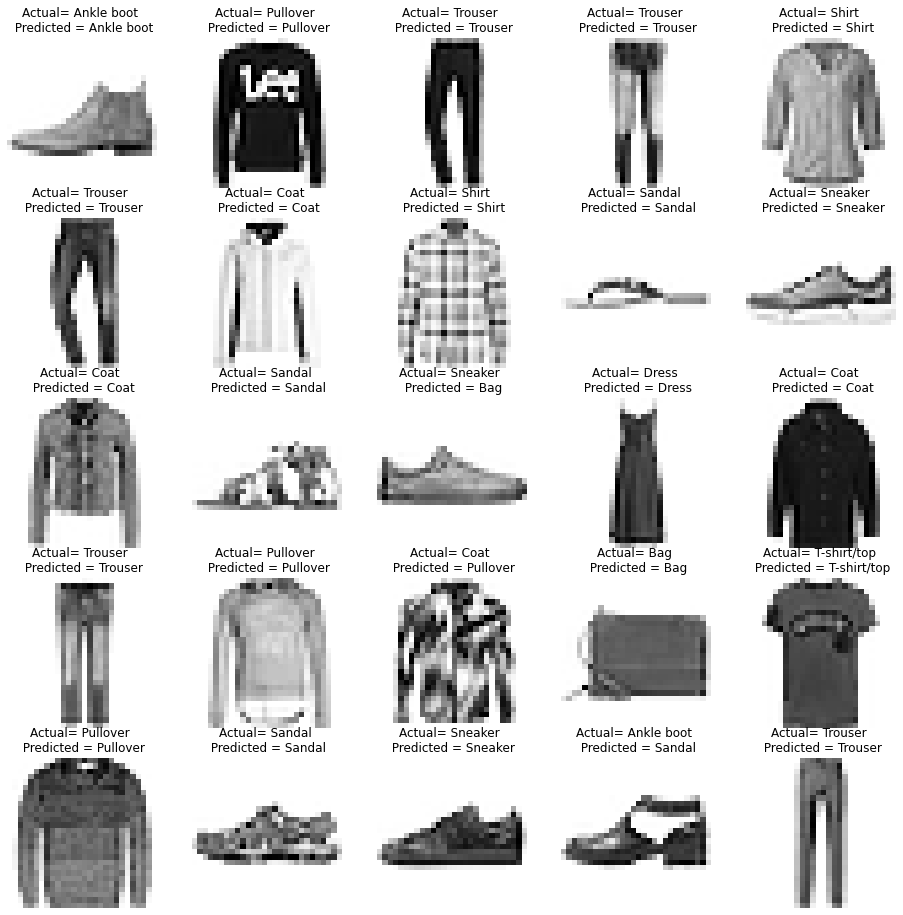

In [ ]:
y_test[0]
 
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i],cmap="Greys")
  plt.axis('off')
  plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [ np.argmax(i) for i in y_pred])

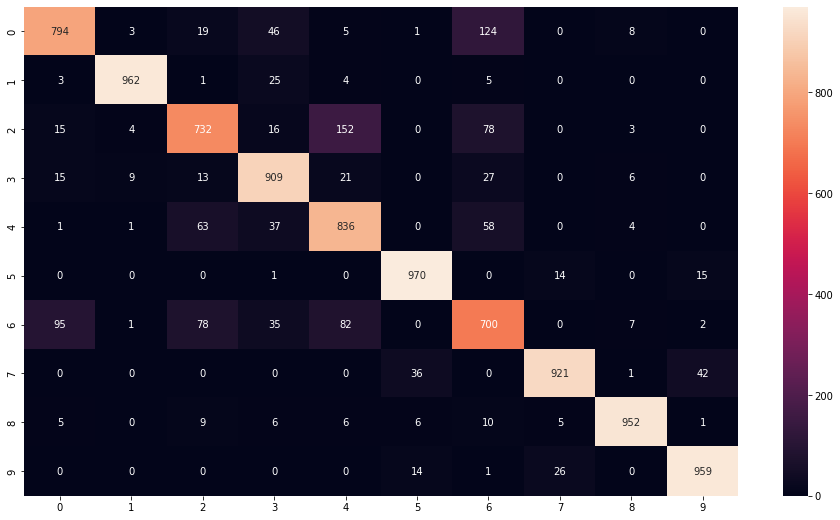

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [ np.argmax(i) for i in y_pred], target_names = class_labels,)
 
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.79      0.82      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.80      0.73      0.76      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.76      0.84      0.79      1000
      Sandal       0.94      0.97      0.96      1000
       Shirt       0.70      0.70      0.70      1000
     Sneaker       0.95      0.92      0.94      1000
         Bag       0.97      0.95      0.96      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [ ]:
model.save("MNIST_classifier_nn_model.h5")

In [ ]:
model = keras.models.load_model("MNIST_classifier_nn_model.h5")
 
y_pred2 = model.predict(X_test)

In [ ]:
y_pred2[0].round(2)
 
np.argmax(y_pred2[0].round(2))

9